In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')

In [3]:
data = pd.read_csv('/Users/willfitzhugh/Desktop/Coding/Supply-Chain-Analysis/Data/Interim/CleanedData.csv', 
                  parse_dates=['OrderDate','ShipDate'])

In [4]:
data['Date'] = data.OrderDate.dt.date
data = data.set_index('OrderDate')

In [85]:
# get sales by D, M, Y function

def group_sales(df, frequency):
    
    grouped_sales = df.groupby( pd.Grouper(freq= frequency) ).sum()[['OrderProfit','OrderSales','Order Item Quantity']]
    
    grouped_sales['NumOrders'] = df.groupby( pd.Grouper(freq= frequency) ).count()['OrderProfit']
    
    grouped_sales['AvgDiscount'] = df.groupby( pd.Grouper(freq= frequency) ).mean()['Order Item Discount Rate']
    
    return grouped_sales

In [56]:
daily_sales = group_sales(data, 'D')
daily_sales

,OrderProfit,OrderSales,Order Item Quantity,NumOrders,AvgDiscount
OrderDate,,,,,
2015-01-01,4433.480025,29379.700398,355,168,0.113690
2015-01-02,1292.849976,26801.900242,354,154,0.100260
2015-01-03,5366.600017,32859.300341,392,179,0.092402
2015-01-04,5630.989989,31869.500330,410,191,0.104241
2015-01-05,3088.100046,27533.050215,373,160,0.113875
...,...,...,...,...,...
2018-01-27,3446.030000,13253.550033,68,68,0.097206
2018-01-28,2732.139997,13372.250030,69,69,0.102319
2018-01-29,1915.689980,13130.530029,68,68,0.105588


<AxesSubplot:xlabel='OrderDate'>

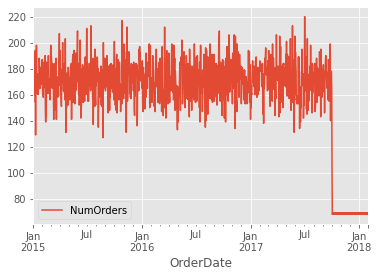

In [58]:
daily_sales.reset_index().plot(x='OrderDate',y='NumOrders')

<AxesSubplot:xlabel='OrderDate'>

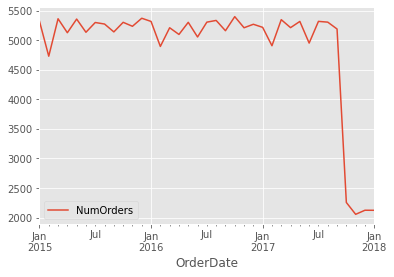

In [62]:
monthly_sales = group_sales(data, 'M')
monthly_sales.reset_index().plot(x='OrderDate',y='NumOrders')

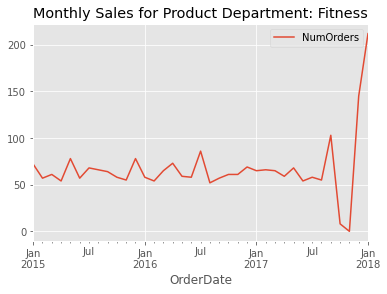

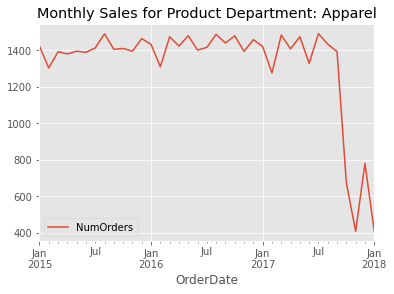

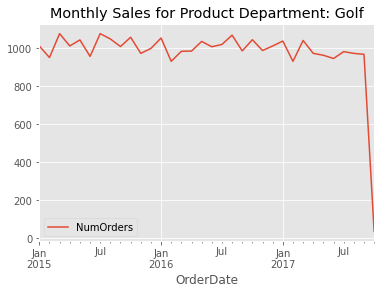

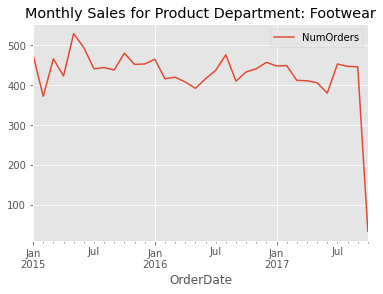

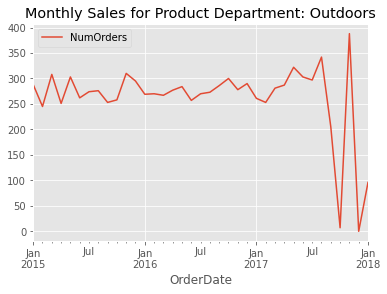

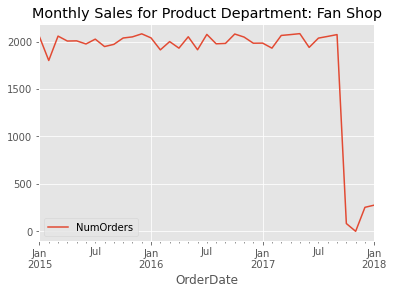

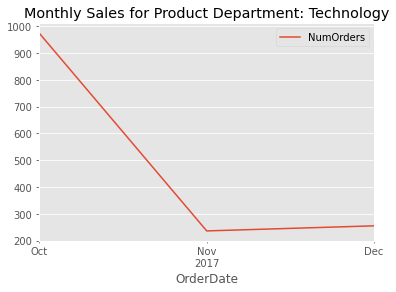

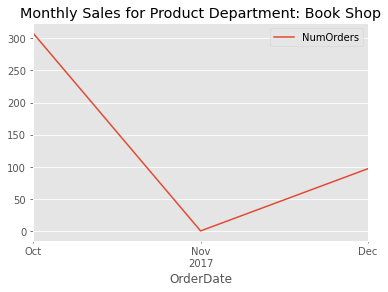

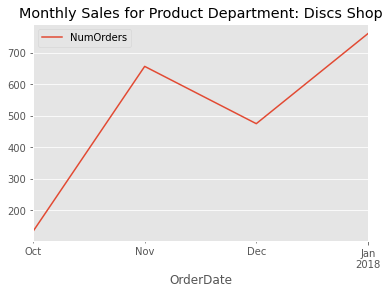

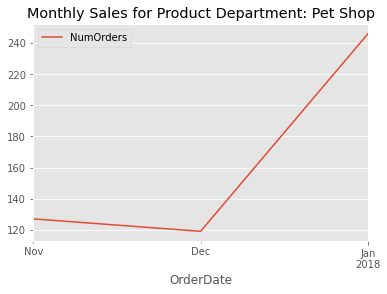

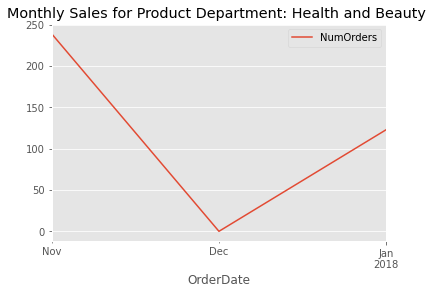

In [90]:
for i in data.ProductDepartment.unique():
    dep_data = data.query( ' ProductDepartment == @i ')
    dep_monthly_sales = group_sales(dep_data, 'M')
    dep_monthly_sales.reset_index().plot(x='OrderDate',y='NumOrders', title = 'Monthly Sales for Product Department: ' + i)

In [5]:
data.groupby('ProductDepartment').mean()[["OrderProfit"]]

,OrderProfit
ProductDepartment,
Apparel,17.998345
Book Shop,2.180272
Discs Shop,11.941323
Fan Shop,27.432366
Fitness,18.772917
Footwear,28.242513
Golf,14.976627
Health and Beauty,26.225497
Outdoors,14.996021


In [ ]:
'''
Apperal, Golf and Fan Shop made up most of the company's business. These three department's sales apparently
plumetted at the end of 2017, and the company's overall sales tanked as a result. It seems that the company started
4 new departments in October and November of 2017, as well as increasing sales in Fitness. 
This seems more like an error in the data, though, unless there is an external explanation for this drop in sales,
like maybe the company had some sort of scandal.
Looking at the avg profit by department, it would make no sense to close the departments that they appartently chose
to close.

Since I have no info on this data, I've made up a story to explain this drop in sales: this company was doing solid
delivery sales but issues with suppliers meant that they couldn't get inventory in these for products for months. 
They want to know what their profits would've looked like had supply not been disrupted.
'''